In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecommerce-customers/Ecommerce Customers.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_absolute_error
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("/kaggle/input/ecommerce-customers/Ecommerce Customers.csv")
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [5]:
df.dtypes

Email                    object
Address                  object
Avatar                   object
Avg. Session Length     float64
Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent     float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [7]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [8]:
df.isna().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [9]:
df.duplicated().sum()

0

# Exploring Data

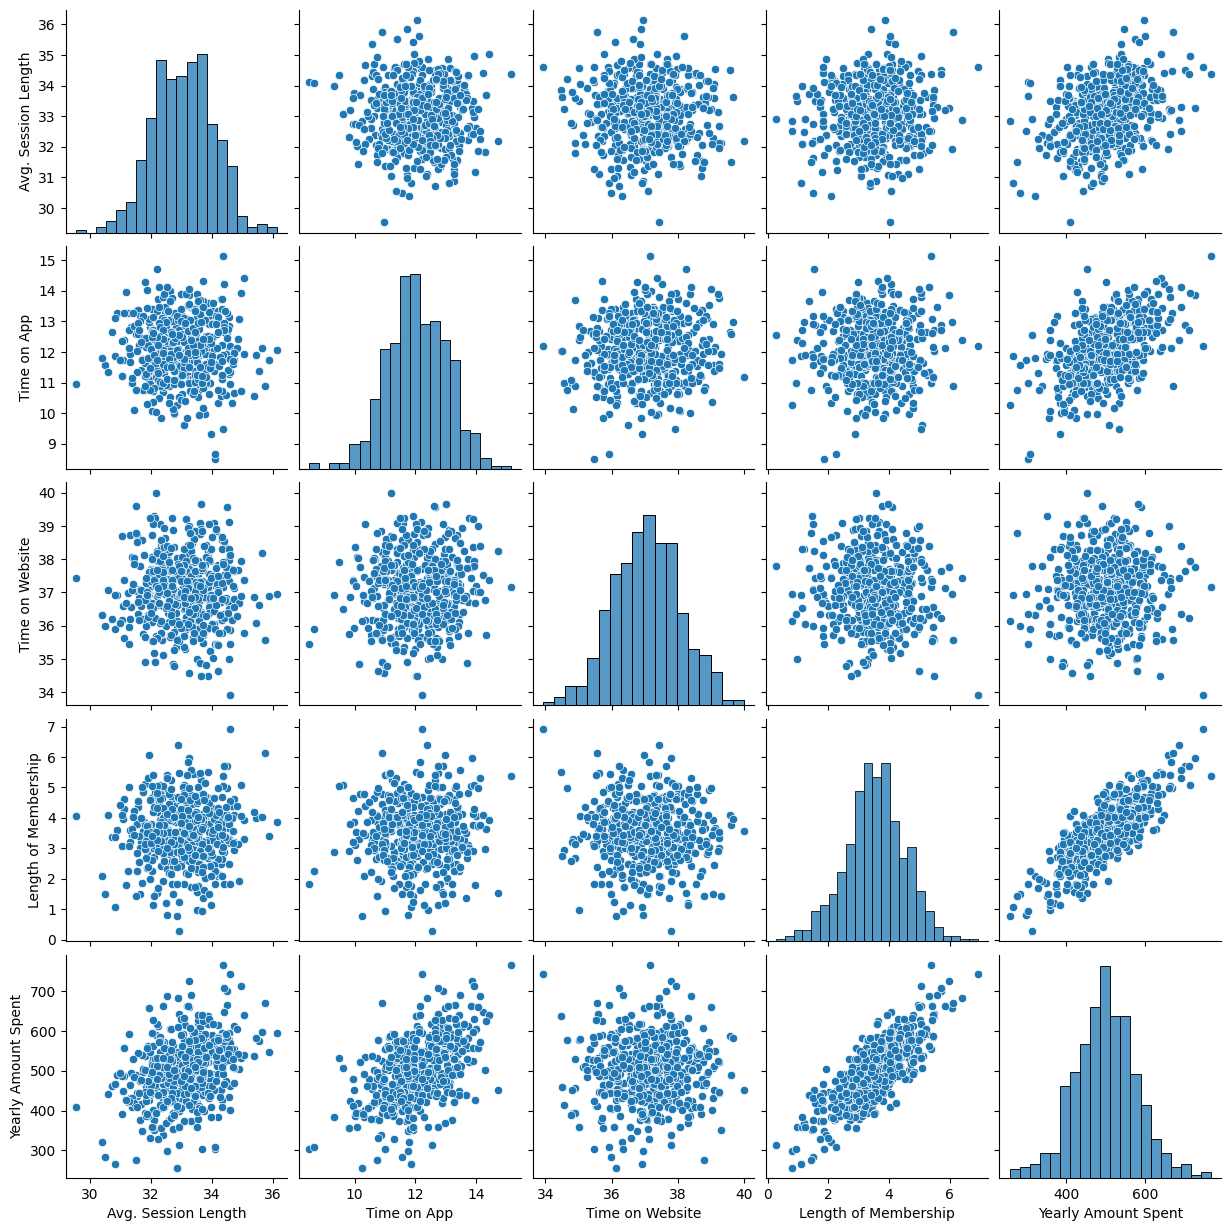

In [10]:
sns.pairplot(df)

In [11]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


<Axes: >

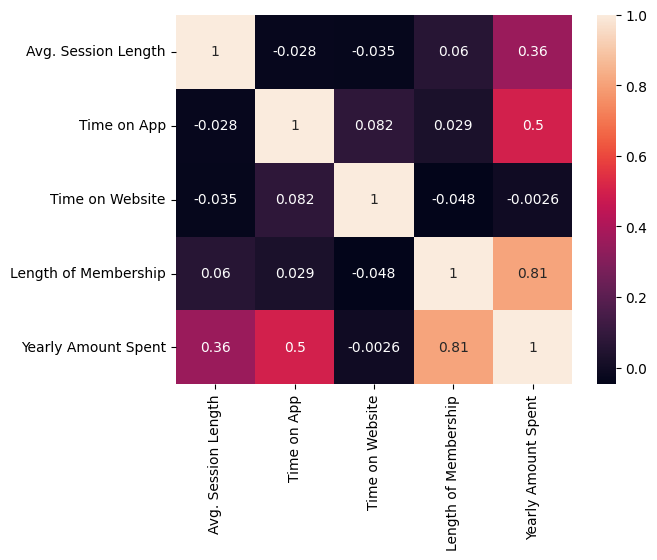

In [12]:
sns.heatmap(numeric_df.corr(),annot=True)

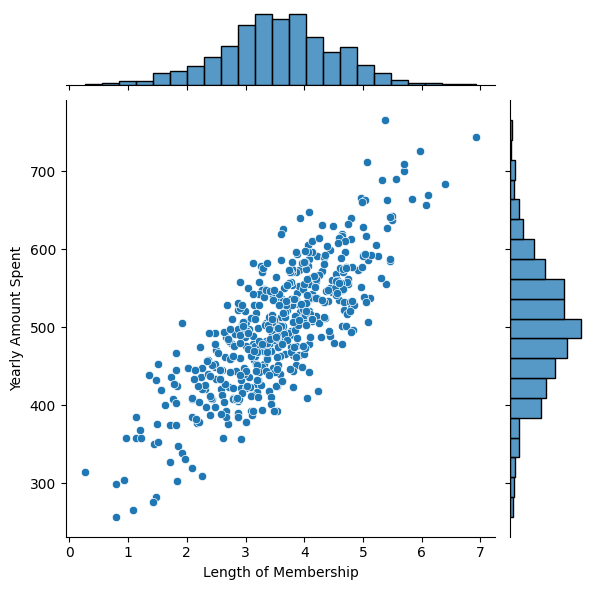

In [13]:
sns.jointplot(data=df, x='Length of Membership',y='Yearly Amount Spent')

<Axes: xlabel='Length of Membership', ylabel='Yearly Amount Spent'>

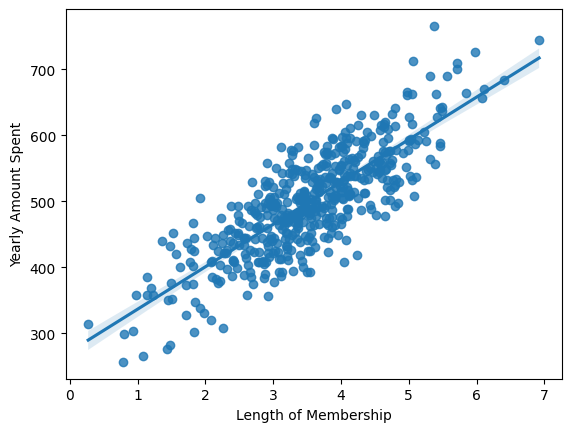

In [14]:
sns.regplot(data=df, x='Length of Membership',y='Yearly Amount Spent')

<Axes: xlabel='Avg. Session Length', ylabel='Yearly Amount Spent'>

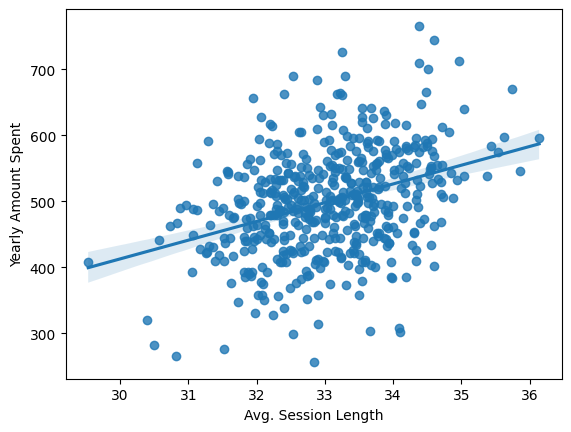

In [15]:
sns.regplot(data=df, x='Avg. Session Length',y='Yearly Amount Spent')

<Axes: xlabel='Time on App', ylabel='Yearly Amount Spent'>

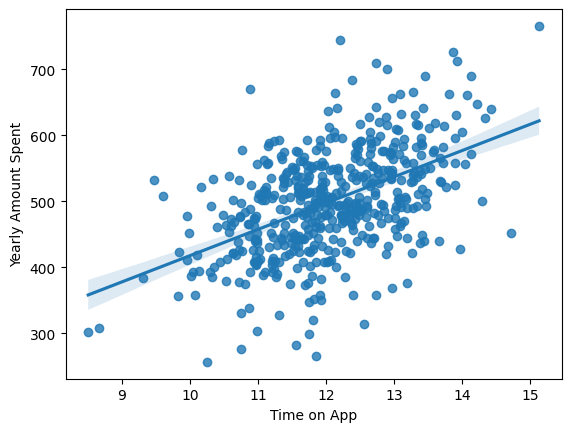

In [16]:
sns.regplot(data=df, x='Time on App',y='Yearly Amount Spent')

<Axes: xlabel='Time on Website', ylabel='Yearly Amount Spent'>

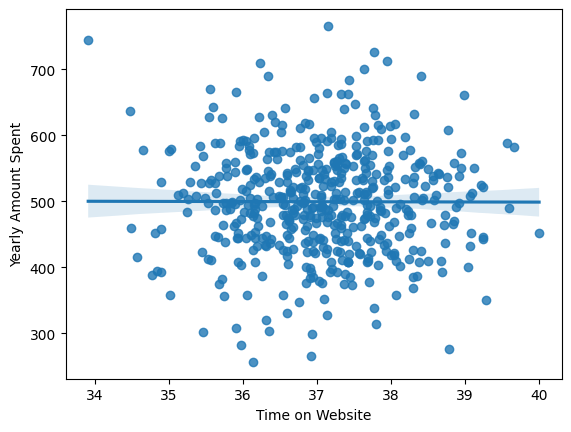

In [17]:
sns.regplot(data=df, x='Time on Website',y='Yearly Amount Spent')

# Data Pre-processing

#### Data Splitting

In [18]:
numeric_df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [19]:
y = df['Yearly Amount Spent']
y

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620145
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 500, dtype: float64

In [20]:
x = df[['Avg. Session Length','Time on App' ,'Time on Website' , 'Length of Membership']]
x

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Model Building & Training

#### Model Training

In [23]:
model = LinearRegression()

In [24]:
model.fit(x_train,y_train)

LinearRegression()

In [25]:
model.coef_

array([25.5962591 , 38.78534598,  0.31038593, 61.89682859])

# Model prediction

In [26]:
model.predict([[25,13,30,6]])

array([480.55111021])

In [27]:
y_predict = model.predict(x_test)
y_predict

array([402.86230051, 542.53325708, 426.62011918, 501.91386363,
       409.6666551 , 569.92155038, 531.50423529, 505.94309188,
       408.10378607, 473.45942928, 441.18668812, 424.52463471,
       424.83341694, 527.12061508, 430.87985533, 423.47062047,
       575.8751518 , 484.6563331 , 457.77896975, 481.58742311,
       501.56110993, 513.12815188, 507.49166899, 646.63377343,
       449.70050586, 496.26290484, 556.18523776, 554.78684161,
       399.1582784 , 325.16921284, 532.62732659, 477.73025415,
       500.76491535, 305.09971374, 505.46811902, 483.52069444,
       519.09464122, 437.75549737, 456.25005245, 470.63517876,
       494.11207805, 444.65549239, 508.57079732, 500.88197484,
       488.35128728, 535.34025218, 594.58301773, 513.59474408,
       279.69877702, 432.71590835, 421.06976164, 480.94327496,
       584.59481888, 608.61734059, 564.42312991, 494.47224504,
       393.95593318, 456.11321352, 572.92228417, 499.27385693,
       512.42973545, 391.56170305, 479.60705887, 481.05

In [28]:
y_test.values

array([401.03313522, 534.7771881 , 418.6027421 , 503.97837905,
       410.06961106, 557.60826205, 538.94197453, 514.33655827,
       408.62018783, 475.01540709, 427.1993849 , 434.02169975,
       411.18696357, 533.51493526, 447.3690272 , 407.54216801,
       573.84743772, 497.5866713 , 466.42119882, 467.80092437,
       510.40138845, 510.50147847, 511.97985999, 640.5840619 ,
       444.2859075 , 502.77107457, 551.62014548, 548.51852928,
       390.10327297, 330.59444603, 535.32161009, 478.60091594,
       499.14015245, 298.76200786, 487.54750487, 498.63559849,
       512.16586639, 444.96655165, 468.6684656 , 483.15972078,
       474.53232944, 439.07476674, 515.50247966, 485.92313052,
       491.07322368, 544.77986372, 587.95105397, 522.33740461,
       275.91842065, 436.51560573, 418.1500811 , 493.71919298,
       573.30622226, 608.27181662, 545.94549214, 483.67330802,
       424.18549429, 452.31567548, 568.71757593, 488.78606109,
       510.66179222, 376.49684072, 473.36049557, 479.24

### Model Evaluation

In [29]:
model.score(x,y)

0.9842900924920522

In [30]:
print(mean_absolute_error(y_test,y_predict))

8.558441885315231


### coeffecients

In [31]:
model.coef_

array([25.5962591 , 38.78534598,  0.31038593, 61.89682859])